In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [23]:
# Create list of all targets (minus background noise)
dataset_path = './recordingTEST'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['ㄏㄧㄡ', 'ㄟ', '吼', '啦', '嗯', '的一個', '的這個', '的那個', '空白', '著', '那', '那那個', '阿']


In [24]:
# Settings
feature_sets_path = './'
feature_sets_filename = './recording1.npz'
#model_filename = 'wake_word_stop_model.h5'
#wake_word = '嗯'

In [25]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [26]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
print(y_test)
print(y_train)
print(y_val)

[ 5. 11. 10.  9.  6. 12.  3. 12.  4.  4.  2.  8. 10. 10. 11.  2.  3. 12.
  9. 10.  4.  9.  9.  4.  8.  7. 12.  2.  8.  0.  4.  1.  3.  9.  3.  9.
  7.  8.  9.]
[10.  7. 11.  8.  1.  7.  2.  0. 12. 10.  1.  3. 10.  9.  8.  7. 11. 12.
  6.  6.  2.  3. 11.  3.  7.  8.  4.  4.  2.  8. 11.  0. 10.  1. 12.  0.
  8.  3.  0.  0. 12.  9.  3.  2.  6.  2.  3.  4.  4.  5.  8.  2. 10.  2.
  5.  5. 10.  0.  0.  8.  4.  5.  6. 11. 10. 11.  6.  4.  7.  9. 11.  1.
  0.  6.  8.  3.  5.  1.  6.  7. 10.  6.  2.  9.  6.  1.  4.  1.  5.  1.
 12.  8.  8.  3. 10.  0.  8.  1.  9.  5. 12.  9.  5. 11.  7.  7.  9.  0.
  5.  1.  0. 12.  4.  4.  0.  5.  2. 10.  0.  3.  7. 11.  3.  5.  1.  1.
  2. 10.  8.  6.  2. 11. 12.  7.  7.  7. 10.  0.  9.  2.  6.  5.  9.  4.
  2. 11.  0.  9.  1.  8. 10.  0.  3.  7. 11.  7.  6.  4. 12.  1. 11. 11.
  2.  3.  4.  4.  8. 11.  0.  5.  5.  3.  4. 12. 10. 10.  3.  6.  7. 11.
  2.  2.  2. 12.  7.  7.  3.  8.  8.  7.  0.  3.  1. 10.  2. 12.  0.  5.
  1.  2.  0.  8.  4.  8.  4. 12.  2. 

In [27]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(312, 16, 16)
(39, 16, 16)
(39, 16, 16)


In [28]:
# Peek at labels
print(y_val)

[12.  5.  6. 11.  0. 12.  0.  4.  6.  2.  5.  8.  9. 10.  1.  4.  0. 12.
 11.  9.  7.  3.  7. 12.  3.  3.  7.  6.  5.  6.  0.  5.  6. 10.  6.  1.
 12. 10.  5.]


In [29]:
# Peek at labels after conversion
print(y_test)

[ 5. 11. 10.  9.  6. 12.  3. 12.  4.  4.  2.  8. 10. 10. 11.  2.  3. 12.
  9. 10.  4.  9.  9.  4.  8.  7. 12.  2.  8.  0.  4.  1.  3.  9.  3.  9.
  7.  8.  9.]


In [30]:
# View the dimensions of our input data
print(x_train.shape)

(312, 16, 16)


In [31]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(312, 16, 16, 1)
(39, 16, 16, 1)
(39, 16, 16, 1)


In [32]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#model.add(layers.Conv2D(32, (2, 2), activation='relu'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))#64
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))#0.5

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))#64
model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation='softmax'))
# Display model
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 15, 15, 32)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 64)          8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [34]:
from tensorflow.keras import optimizers
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',    #'adam'
              metrics=['acc'])

In [35]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=100,#100
                    batch_size=50,#50
                    validation_data=(x_val, y_val))

Epoch 1/100
7/7 [==============================] - 1s 36ms/step - loss: 4.0368 - acc: 0.0577 - val_loss: 2.5208 - val_acc: 0.0769
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 2.8803 - acc: 0.0833 - val_loss: 2.5127 - val_acc: 0.1538
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 2.5793 - acc: 0.1186 - val_loss: 2.4942 - val_acc: 0.1282
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 2.4961 - acc: 0.1058 - val_loss: 2.4621 - val_acc: 0.1795
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 2.4657 - acc: 0.1410 - val_loss: 2.4415 - val_acc: 0.1538
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 2.3247 - acc: 0.2468 - val_loss: 2.3997 - val_acc: 0.1795
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 2.3202 - acc: 0.2019 - val_loss: 2.3602 - val_acc: 0.1026
Epoch 8/100
7/7 [==============================] - 0s 10ms/step - loss: 2.2580 - acc: 0.20

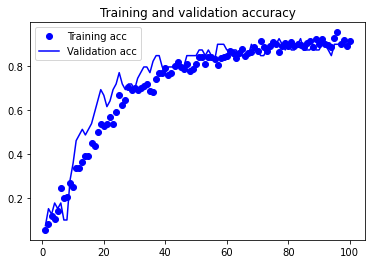

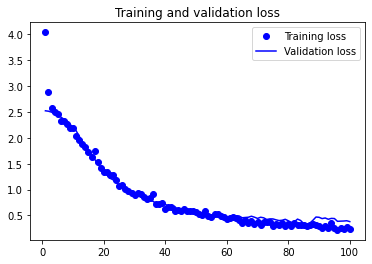

In [36]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
# Save the model as a file
models.save_model(model, './h5/recording1.h5')

In [40]:
# TEST: Load model and run it against test set
model = models.load_model('./h5/recording1.h5')
for i in range(0, 30):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 5.0  Prediction: [[1.3793856e-04 5.5768378e-05 5.3959235e-07 5.6074950e-06 3.2739608e-05
  9.9964750e-01 8.6467888e-05 1.0231596e-05 3.9794768e-06 1.4705507e-05
  1.0503314e-06 3.4446434e-06 5.3187385e-08]]
Answer: 11.0  Prediction: [[1.14592876e-04 4.39647381e-04 2.07435209e-04 5.85601758e-03
  5.60844736e-03 2.93075602e-04 1.04335712e-04 1.11990031e-02
  3.75212621e-05 7.40510950e-05 3.62580717e-02 9.32306409e-01
  7.50131160e-03]]
Answer: 10.0  Prediction: [[7.8005207e-05 1.0090913e-05 2.9714104e-07 2.9310468e-04 1.6360721e-08
  3.8631066e-07 1.8580094e-07 1.1168254e-06 2.8320924e-08 6.8360954e-08
  9.9953330e-01 7.2877468e-05 1.0496812e-05]]
Answer: 9.0  Prediction: [[1.2955924e-04 1.5075808e-07 2.2111135e-05 1.3523595e-06 9.7643278e-06
  3.2895248e-06 6.7733829e-08 2.1390132e-07 8.4744643e-05 9.9973947e-01
  1.7109501e-08 2.0798316e-08 9.3466624e-06]]
Answer: 6.0  Prediction: [[1.51347835e-04 6.80806188e-05 4.59394767e-04 1.03221675e-04
  2.68893670e-02 1.77872670e-03 7.91

In [39]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.1450 - acc: 0.9744


[0.1449945718050003, 0.9743589758872986]